## 과제 1
ReLu activation function과 derivative function을 구현해보세요
- Hint : np.maximum 함수 사용하면 편리합니다
- 다른 방법 사용하셔도 무방합니다


In [18]:
def relu(x):
  return max(0,x)

In [19]:
def d_relu(x):
 return (x > 0) * 1

## 과제 2
Deep Learning Basic 코드 파일의 MLP implementation with Numpy library using MNIST dataset 코드 참고해서
Three layer MLP 일 때의 backward_pass 함수를 완성해주세요.   
- Hint : 코드 파일의 예시는 Two layer MLP


In [1]:
import numpy as np

In [ ]:
def backward_pass(x, y_true, params):

  dS3 = params["A3"] - y_true
  # Please check http://machinelearningmechanic.com/deep_learning/2019/09/04/cross-entropy-loss-derivative.html
  # dS2 is softmax + CE loss derivative

  grads = {}

  grads["dW3"] =  np.dot(dS3, params["A2"].T)/x.shape[1]
  grads["db3"] =  (1/x.shape[1])*np.sum(dS3, axis=1, keepdims=True)/x.shape[1]

  dA2 = np.dot(params["W3"].T, dS3)
  dS2 = dA2 * d_sigmoid(params["S2"])

  grads["dW2"] =  np.dot(dS2, params["A1"].T)/x.shape[1]
  grads["db2"] =  (1/x.shape[1])*np.sum(dS2, axis=1, keepdims=True)/x.shape[1]

  dA1 = np.dot(params["W2"].T, dS2)
  dS1 = dA1 * d_sigmoid(params["S1"])

  grads["dW1"] = np.dot(dS1, x.T)/x.shape[1]
  grads["db1"] = np.sum(dS1, axis=1, keepdims=True)/x.shape[1]

  return grads

## 과제 3
Deep Learning Basic 코드 파일의 MLP implementation with Pytorch library using MNIST dataset 코드 참고해서
Three layer MLP를 구한후, 학습을 돌려 보세요

hyperparameter는 다음과 같이 설정

- epochs : 100
- hiddensize : 128, 64 (two layer)
- learning_rate : 0.5

In [ ]:
# Assignment 3 구현은 여기서 ()

### 데이터셋과 Dataloader 생성

In [5]:
from torchvision import transforms, datasets
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [6]:
# 이미지를 텐서로 변경
transform = transforms.Compose([
    transforms.ToTensor()
])

In [7]:
trainset = datasets.MNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.MNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./.data/MNIST/raw/train-images-idx3-ubyte.gz to ./.data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./.data/MNIST/raw/train-labels-idx1-ubyte.gz to ./.data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./.data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./.data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/MNIST/raw



In [8]:
BATCH_SIZE = 512
# train set과 test set 각각에 대하여 DataLoader를 생성합니다.
# shuffle=True 매개변수를 넣어 데이터를 섞어주세요.
train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
test_loader =  DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True)

### MLP 구현

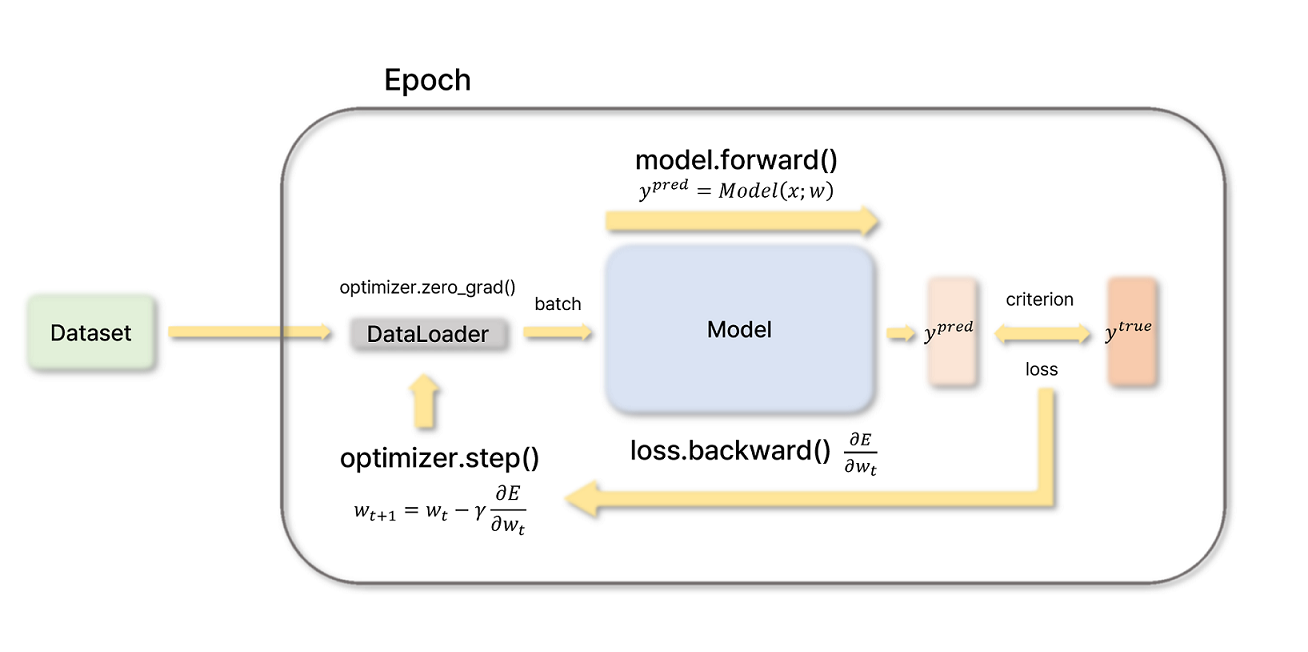

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(784,128)
        self.layer2 = nn.Linear(128,64)
        self.layer3 = nn.Linear(64,10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = x.view(-1, 784)
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.relu(out)
        out = self.layer3(out)
        out = self.relu(out)

        return out

In [17]:
model = Net()
model

Net(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)

In [18]:
list(model.parameters()) # 행렬들을 직접 살펴볼 수 있음
                         # require_true 얘는 학습되는 애구나 알 수 있음

[Parameter containing:
 tensor([[-0.0276,  0.0354,  0.0078,  ...,  0.0313,  0.0100, -0.0298],
         [ 0.0021,  0.0056,  0.0174,  ...,  0.0068,  0.0114,  0.0282],
         [ 0.0233, -0.0320, -0.0290,  ..., -0.0005, -0.0030, -0.0039],
         ...,
         [ 0.0253,  0.0058,  0.0357,  ..., -0.0286, -0.0212, -0.0031],
         [-0.0132,  0.0094, -0.0342,  ..., -0.0261,  0.0264,  0.0329],
         [ 0.0051,  0.0030, -0.0012,  ..., -0.0127,  0.0027, -0.0323]],
        requires_grad=True), Parameter containing:
 tensor([ 2.1297e-03, -3.4069e-02,  8.0266e-03, -1.6594e-03, -3.4991e-02,
          2.7278e-03, -3.2983e-02, -2.4615e-02,  3.5487e-03,  3.5061e-02,
          2.7444e-02, -2.1986e-05,  1.2556e-03, -3.1800e-02,  4.3142e-03,
          3.6262e-03,  6.1989e-03,  3.0066e-02,  3.5212e-02,  7.2561e-03,
          3.3655e-02, -7.7203e-03,  2.0157e-02,  1.8059e-02,  1.2977e-02,
          2.1034e-02,  3.4032e-02,  1.3241e-02, -2.7487e-02,  3.3549e-02,
         -2.5805e-02, -1.1126e-03,  1.958

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

### train 함수

In [20]:
def train(model, train_loader, optimizer):
    model.train()
    # 배치 당 loss 값을 담을 리스트 생성
    batch_losses = []

    for data, target in train_loader:
        # 옵티마이저의 기울기 초기화
        optimizer.zero_grad()

        # y pred 값 산출
        output = model(data)
        # loss 계산
        # 정답 데이터와의 cross entropy loss 계산
        # 이 loss를 배치 당 loss로 보관
        loss = criterion(output, target)
        batch_losses.append(loss)

        # 기울기 계산
        loss.backward()

        # 가중치 업데이트!
        optimizer.step()
        
    # 배치당 평균 loss 계산
    avg_loss = sum(batch_losses) / len(batch_losses)
    
    return avg_loss

### eval 함수

In [21]:
def evaluate(model, test_loader):
    # 모델을 평가 모드로 전환
    model.eval()

    batch_losses = []
    correct = 0 

    with torch.no_grad(): 
        for data, target in test_loader:
            # 예측값 생성
            output = model(data)

            # loss 계산 (이전과 동일)
            loss = criterion(output, target)
            batch_losses.append(loss)

           # Accuracy 계산
           # y pred와 y가 일치하면 correct에 1을 더해주기
            pred = output.max(1, keepdim=True)[1]

            # eq() 함수는 값이 일치하면 1을, 아니면 0을 출력.
            correct += pred.eq(target.view_as(pred)).sum().item()

    # 배치 당 평균 loss 계산 
    avg_loss =  sum(batch_losses) / len(batch_losses)

    #정확도 계산
    accuracy = 100. * correct / len(test_loader.dataset)

    return avg_loss, accuracy

### 학습 진행

In [ ]:
EPOCHS = 30

for epoch in range(1, EPOCHS + 1):
    train_loss = train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Train Loss: {:.4f}\tTest Loss: {:.4f}\tAccuracy: {:.2f}%'.format(
          epoch, train_loss, test_loss, test_accuracy))

[1] Train Loss: 2.2159	Test Loss: 2.2134	Accuracy: 41.31%
[2] Train Loss: 2.2107	Test Loss: 2.2073	Accuracy: 41.55%
[3] Train Loss: 2.2049	Test Loss: 2.2023	Accuracy: 41.71%
[4] Train Loss: 2.1991	Test Loss: 2.1960	Accuracy: 41.82%
[5] Train Loss: 2.1929	Test Loss: 2.1895	Accuracy: 42.02%
[6] Train Loss: 2.1861	Test Loss: 2.1826	Accuracy: 42.32%
[7] Train Loss: 2.1793	Test Loss: 2.1753	Accuracy: 42.53%
[8] Train Loss: 2.1714	Test Loss: 2.1667	Accuracy: 42.64%
[9] Train Loss: 2.1631	Test Loss: 2.1586	Accuracy: 42.81%
[10] Train Loss: 2.1541	Test Loss: 2.1493	Accuracy: 42.99%
[11] Train Loss: 2.1445	Test Loss: 2.1390	Accuracy: 43.22%
[12] Train Loss: 2.1343	Test Loss: 2.1277	Accuracy: 43.59%
[13] Train Loss: 2.1236	Test Loss: 2.1173	Accuracy: 44.05%
[14] Train Loss: 2.1124	Test Loss: 2.1058	Accuracy: 44.53%
[15] Train Loss: 2.1009	Test Loss: 2.0935	Accuracy: 45.09%
[16] Train Loss: 2.0882	Test Loss: 2.0811	Accuracy: 45.50%
[17] Train Loss: 2.0757	Test Loss: 2.0678	Accuracy: 46.02%
[18] T

## 과제 4
과제 3 부분의 성능을 지금까지 배운 지식을 바탕으로 향상시켜보세요

- Hint : Activation function, hyperparameter setting

In [ ]:
EPOCHS = 500

for epoch in range(1, EPOCHS + 1):
    train_loss = train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Train Loss: {:.4f}\tTest Loss: {:.4f}\tAccuracy: {:.2f}%'.format(
          epoch, train_loss, test_loss, test_accuracy))

**무엇을 보완하였고, 왜 보완되었는지에 대한 자유 서술 (아래에)**

In [ ]:
# epochs를 100회에서 500회로 반복 횟수 UP